# Importamos librerias

In [3]:
library(tidyverse)

In [4]:
library(dplyr)

Leemos la base de datos de IMDB (https://www.imdb.com/interfaces/). Usemos la función download.file:
 - download.file(URL, direccion_descarga)

In [5]:
download.file("https://datasets.imdbws.com/title.basics.tsv.gz", "title.basics.tsv.gz")

Notemos que es un archivo ".tsv.gz". Para abrirlo podemos buscar en internet, nos dara que debemos usar la funcion gzfile y luego la funcion read_tsv 

In [6]:
?read_tsv

read_delim {readr},R Documentation
file,"Either a path to a file, a connection, or literal data (either a single string or a raw vector). Files ending in .gz, .bz2, .xz, or .zip will be automatically uncompressed. Files starting with http://, https://, ftp://, or ftps:// will be automatically downloaded. Remote gz files can also be automatically downloaded and decompressed. Literal data is most useful for examples and tests. To be recognised as literal data, the input must be either wrapped with I(), be a string containing at least one new line, or be a vector containing at least one string with a new line. Using a value of clipboard() will read from the system clipboard."
delim,Single character used to separate fields within a record.
quote,Single character used to quote strings.
escape_backslash,"Does the file use backslashes to escape special characters? This is more general than escape_double as backslashes can be used to escape the delimiter character, the quote character, or to add special characters like \\n."
escape_double,"Does the file escape quotes by doubling them? i.e. If this option is TRUE, the value """""""" represents a single quote, \""."
col_names,"Either TRUE, FALSE or a character vector of column names. If TRUE, the first row of the input will be used as the column names, and will not be included in the data frame. If FALSE, column names will be generated automatically: X1, X2, X3 etc. If col_names is a character vector, the values will be used as the names of the columns, and the first row of the input will be read into the first row of the output data frame. Missing (NA) column names will generate a warning, and be filled in with dummy names ...1, ...2 etc. Duplicate column names will generate a warning and be made unique, see name_repair to control how this is done."
col_types,"One of NULL, a cols() specification, or a string. See vignette(""readr"") for more details. If NULL, all column types will be inferred from guess_max rows of the input, interspersed throughout the file. This is convenient (and fast), but not robust. If the guessed types are wrong, you'll need to increase guess_max or supply the correct types yourself. Column specifications created by list() or cols() must contain one column specification for each column. If you only want to read a subset of the columns, use cols_only(). Alternatively, you can use a compact string representation where each character represents one column: c = character i = integer n = number d = double l = logical f = factor D = date T = date time t = time ? = guess _ or - = skip By default, reading a file without a column specification will print a message showing what readr guessed they were. To remove this message, set show_col_types = FALSE or set 'options(readr.show_col_types = FALSE)."
col_select,"Columns to include in the results. You can use the same mini-language as dplyr::select() to refer to the columns by name. Use c() to use more than one selection expression. Although this usage is less common, col_select also accepts a numeric column index. See ?tidyselect::language for full details on the selection language."
id,"The name of a column in which to store the file path. This is useful when reading multiple input files and there is data in the file paths, such as the data collection date. If NULL (the default) no extra column is created."
locale,"The locale controls defaults that vary from place to place. The default locale is US-centric (like R), but you can use locale() to create your own locale that controls things like the default time zone, encoding, decimal mark, big mark, and day/month names."


In [7]:
peliculas <- as.data.frame(read_tsv(gzfile("title.basics.tsv.gz")))

Warning message:
“One or more parsing issues, call `problems()` on your data frame for details,
e.g.:
  dat <- vroom(...)
  problems(dat)”
Rows: 9890756 Columns: 9
── Column specification ────────────────────────────────────────────────────────
Delimiter: "\t"
chr (8): tconst, titleType, primaryTitle, originalTitle, startYear, endYear,...
dbl (1): isAdult

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


In [8]:
head(peliculas)

,tconst,titleType,primaryTitle,originalTitle,isAdult,startYear,endYear,runtimeMinutes,genres
,<chr>,<chr>,<chr>,<chr>,<dbl>,<chr>,<chr>,<chr>,<chr>
1,tt0000001,short,Carmencita,Carmencita,0,1894,\N,1,"Documentary,Short"
2,tt0000002,short,Le clown et ses chiens,Le clown et ses chiens,0,1892,\N,5,"Animation,Short"
3,tt0000003,short,Pauvre Pierrot,Pauvre Pierrot,0,1892,\N,4,"Animation,Comedy,Romance"
4,tt0000004,short,Un bon bock,Un bon bock,0,1892,\N,12,"Animation,Short"
5,tt0000005,short,Blacksmith Scene,Blacksmith Scene,0,1893,\N,1,"Comedy,Short"
6,tt0000006,short,Chinese Opium Den,Chinese Opium Den,0,1894,\N,1,Short


**Objetivo 1**: armar la base de datos descrita en las diapositivas.

# Proyección 

In [9]:
nombres <- c("tconst","primaryTitle","startYear","genres")

In [10]:
select(peliculas, nombres)

Warning message:
“Using an external vector in selections was deprecated in tidyselect 1.1.0.
ℹ Please use `all_of()` or `any_of()` instead.
  # Was:
  data %>% select(nombres)

  # Now:
  data %>% select(all_of(nombres))

See <https://tidyselect.r-lib.org/reference/faq-external-vector.html>.”


tconst,primaryTitle,startYear,genres
<chr>,<chr>,<chr>,<chr>
tt0000001,Carmencita,1894,"Documentary,Short"
tt0000002,Le clown et ses chiens,1892,"Animation,Short"
tt0000003,Pauvre Pierrot,1892,"Animation,Comedy,Romance"
tt0000004,Un bon bock,1892,"Animation,Short"
tt0000005,Blacksmith Scene,1893,"Comedy,Short"
tt0000006,Chinese Opium Den,1894,Short
tt0000007,Corbett and Courtney Before the Kinetograph,1894,"Short,Sport"
tt0000008,Edison Kinetoscopic Record of a Sneeze,1894,"Documentary,Short"
tt0000009,Miss Jerry,1894,Romance


# Filtros

Necesitamos filtrar los datos que no deberian estar dentro de la base de datos de peliculas

**Importante** ¿Qué datos tienen las columnas de la base de datos?

In [11]:
unique(peliculas[["titleType"]])



[1] "short"        "movie"        "tvShort"      "tvMovie"      "tvSeries"    
 [6] "tvEpisode"    "tvMiniSeries" "tvSpecial"    "video"        "videoGame"   
[11] "tvPilot"

In [14]:
filter(peliculas,titleType=="movie")

tconst,titleType,primaryTitle,originalTitle,isAdult,startYear,endYear,runtimeMinutes,genres
<chr>,<chr>,<chr>,<chr>,<dbl>,<chr>,<chr>,<chr>,<chr>
tt0000009,movie,Miss Jerry,Miss Jerry,0,1894,\N,45,Romance
tt0000147,movie,The Corbett-Fitzsimmons Fight,The Corbett-Fitzsimmons Fight,0,1897,\N,100,"Documentary,News,Sport"
tt0000502,movie,Bohemios,Bohemios,0,1905,\N,100,\N
tt0000574,movie,The Story of the Kelly Gang,The Story of the Kelly Gang,0,1906,\N,70,"Action,Adventure,Biography"
tt0000591,movie,The Prodigal Son,L'enfant prodigue,0,1907,\N,90,Drama
tt0000615,movie,Robbery Under Arms,Robbery Under Arms,0,1907,\N,\N,Drama
tt0000630,movie,Hamlet,Amleto,0,1908,\N,\N,Drama
tt0000675,movie,Don Quijote,Don Quijote,0,1908,\N,\N,Drama
tt0000679,movie,The Fairylogue and Radio-Plays,The Fairylogue and Radio-Plays,0,1908,\N,120,"Adventure,Fantasy"


In [15]:
filter(peliculas,titleType=="tvMovie")

tconst,titleType,primaryTitle,originalTitle,isAdult,startYear,endYear,runtimeMinutes,genres
<chr>,<chr>,<chr>,<chr>,<dbl>,<chr>,<chr>,<chr>,<chr>
tt0030298,tvMovie,Julius Caesar,Julius Caesar,0,1938,\N,101,"Drama,History"
tt0038309,tvMovie,As You Like It,As You Like It,0,1946,\N,\N,Drama
tt0038738,tvMovie,A Midsummer Night's Dream,A Midsummer Night's Dream,0,1946,\N,150,"Drama,Fantasy"
tt0039445,tvMovie,Hamlet Part 1,Hamlet Part 1,0,1947,\N,88,Drama
tt0039618,tvMovie,The Merchant of Venice,The Merchant of Venice,0,1947,\N,90,Drama
tt0039624,tvMovie,A Midsummer Night's Dream,A Midsummer Night's Dream,0,1947,\N,\N,Fantasy
tt0040060,tvMovie,Wit and Wisdom,Wit and Wisdom,0,1948,\N,45,Comedy
tt0040510,tvMovie,The Tragedy of King Lear Part 1,The Tragedy of King Lear Part 1,0,1948,\N,108,Drama
tt0041533,tvMovie,Julius Caesar,Julius Caesar,0,1949,\N,\N,"Drama,History"


Otra opcion es condiciones mediante vectores booleanos, lo bueno es que se pueden usar filtros en los nombres de las columnas tambien (como una proyección)

In [16]:
peliculas[peliculas["titleType"]=="movie",]

,tconst,titleType,primaryTitle,originalTitle,isAdult,startYear,endYear,runtimeMinutes,genres
,<chr>,<chr>,<chr>,<chr>,<dbl>,<chr>,<chr>,<chr>,<chr>
9,tt0000009,movie,Miss Jerry,Miss Jerry,0,1894,\N,45,Romance
145,tt0000147,movie,The Corbett-Fitzsimmons Fight,The Corbett-Fitzsimmons Fight,0,1897,\N,100,"Documentary,News,Sport"
499,tt0000502,movie,Bohemios,Bohemios,0,1905,\N,100,\N
571,tt0000574,movie,The Story of the Kelly Gang,The Story of the Kelly Gang,0,1906,\N,70,"Action,Adventure,Biography"
588,tt0000591,movie,The Prodigal Son,L'enfant prodigue,0,1907,\N,90,Drama
611,tt0000615,movie,Robbery Under Arms,Robbery Under Arms,0,1907,\N,\N,Drama
626,tt0000630,movie,Hamlet,Amleto,0,1908,\N,\N,Drama
669,tt0000675,movie,Don Quijote,Don Quijote,0,1908,\N,\N,Drama
673,tt0000679,movie,The Fairylogue and Radio-Plays,The Fairylogue and Radio-Plays,0,1908,\N,120,"Adventure,Fantasy"


In [ ]:
peliculas[peliculas["titleType"]=="movie",nombres]

Finalmente

In [ ]:
filter(peliculas,(titleType=="movie")| (titleType=="tvMovie"))

# Union

Otra manera de hacer esto seria unir las dos consultas filtradas.

In [17]:
union(filter(peliculas,titleType=="movie"), filter(peliculas,titleType=="tvMovie"))

tconst,titleType,primaryTitle,originalTitle,isAdult,startYear,endYear,runtimeMinutes,genres
<chr>,<chr>,<chr>,<chr>,<dbl>,<chr>,<chr>,<chr>,<chr>
tt0000009,movie,Miss Jerry,Miss Jerry,0,1894,\N,45,Romance
tt0000147,movie,The Corbett-Fitzsimmons Fight,The Corbett-Fitzsimmons Fight,0,1897,\N,100,"Documentary,News,Sport"
tt0000502,movie,Bohemios,Bohemios,0,1905,\N,100,\N
tt0000574,movie,The Story of the Kelly Gang,The Story of the Kelly Gang,0,1906,\N,70,"Action,Adventure,Biography"
tt0000591,movie,The Prodigal Son,L'enfant prodigue,0,1907,\N,90,Drama
tt0000615,movie,Robbery Under Arms,Robbery Under Arms,0,1907,\N,\N,Drama
tt0000630,movie,Hamlet,Amleto,0,1908,\N,\N,Drama
tt0000675,movie,Don Quijote,Don Quijote,0,1908,\N,\N,Drama
tt0000679,movie,The Fairylogue and Radio-Plays,The Fairylogue and Radio-Plays,0,1908,\N,120,"Adventure,Fantasy"


Tambien existe la funcion cbind en R que nos permite unir las bases de datos por las columnas, es decir, agregar atributos.

## Agregar operaciones

Como agrupar lo que llevamos hasta el momento?
Recordar operador %>%

In [18]:
peliculas %>% select(c("tconst","primaryTitle","startYear","genres")) %>%
              filter((titleType=="movie")| (titleType=="tvMovie"))

ERROR: [1m[33mError[39m in `filter()`:[22m
[1m[22m[36mℹ[39m In argument: `(titleType == "movie") | (titleType == "tvMovie")`.
[1mCaused by error:[22m
[33m![39m object 'titleType' not found


In [19]:
peliculas %>% select(c("tconst","primaryTitle","startYear","genres", "titleType")) %>%
              filter((titleType=="movie")| (titleType=="tvMovie"))

tconst,primaryTitle,startYear,genres,titleType
<chr>,<chr>,<chr>,<chr>,<chr>
tt0000009,Miss Jerry,1894,Romance,movie
tt0000147,The Corbett-Fitzsimmons Fight,1897,"Documentary,News,Sport",movie
tt0000502,Bohemios,1905,\N,movie
tt0000574,The Story of the Kelly Gang,1906,"Action,Adventure,Biography",movie
tt0000591,The Prodigal Son,1907,Drama,movie
tt0000615,Robbery Under Arms,1907,Drama,movie
tt0000630,Hamlet,1908,Drama,movie
tt0000675,Don Quijote,1908,Drama,movie
tt0000679,The Fairylogue and Radio-Plays,1908,"Adventure,Fantasy",movie


Ahora deberiamos eliminar la columna titleType, podriamos seleccionar todas las columnas que nos interesan, sin embargo existe una forma mas facil en R

In [24]:
peliculas2 <- peliculas %>% 
              select(c("tconst","primaryTitle","startYear","genres", "titleType")) %>%
              filter((titleType=="movie")| (titleType=="tvMovie")) %>%
              select(-c( "titleType"))

In [25]:
peliculas2

tconst,primaryTitle,startYear,genres
<chr>,<chr>,<chr>,<chr>
tt0000009,Miss Jerry,1894,Romance
tt0000147,The Corbett-Fitzsimmons Fight,1897,"Documentary,News,Sport"
tt0000502,Bohemios,1905,\N
tt0000574,The Story of the Kelly Gang,1906,"Action,Adventure,Biography"
tt0000591,The Prodigal Son,1907,Drama
tt0000615,Robbery Under Arms,1907,Drama
tt0000630,Hamlet,1908,Drama
tt0000675,Don Quijote,1908,Drama
tt0000679,The Fairylogue and Radio-Plays,1908,"Adventure,Fantasy"


# Renombrar

In [26]:
names(peliculas2)

[1] "tconst"       "primaryTitle" "startYear"    "genres"

In [27]:
peliculas2 <- rename(peliculas2,c('ID'='tconst', 'Nombre'='primaryTitle'))


In [28]:
names(peliculas2) <- c("ID", "Nombre", "Agno", "Categoria")

In [29]:
head(peliculas2)

,ID,Nombre,Agno,Categoria
,<chr>,<chr>,<chr>,<chr>
1,tt0000009,Miss Jerry,1894,Romance
2,tt0000147,The Corbett-Fitzsimmons Fight,1897,"Documentary,News,Sport"
3,tt0000502,Bohemios,1905,\N
4,tt0000574,The Story of the Kelly Gang,1906,"Action,Adventure,Biography"
5,tt0000591,The Prodigal Son,1907,Drama
6,tt0000615,Robbery Under Arms,1907,Drama


# Producto Cruz

Necesitamos unir la base de datos de peliculas con los ratings de ellas. Por esto tenemos que leer la base ratings

In [20]:
download.file("https://datasets.imdbws.com/title.ratings.tsv.gz", "ratings.tsv.gz")

In [21]:
ratings <- as.data.frame(read_tsv(gzfile("ratings.tsv.gz")))

Rows: 1316976 Columns: 3
── Column specification ────────────────────────────────────────────────────────
Delimiter: "\t"
chr (1): tconst
dbl (2): averageRating, numVotes

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


In [22]:
ratings

tconst,averageRating,numVotes
<chr>,<dbl>,<dbl>
tt0000001,5.7,1976
tt0000002,5.8,264
tt0000003,6.5,1825
tt0000004,5.6,178
tt0000005,6.2,2617
tt0000006,5.1,182
tt0000007,5.4,820
tt0000008,5.4,2115
tt0000009,5.3,206


In [30]:
peliculas2[1:1000,]

,ID,Nombre,Agno,Categoria
,<chr>,<chr>,<chr>,<chr>
1,tt0000009,Miss Jerry,1894,Romance
2,tt0000147,The Corbett-Fitzsimmons Fight,1897,"Documentary,News,Sport"
3,tt0000502,Bohemios,1905,\N
4,tt0000574,The Story of the Kelly Gang,1906,"Action,Adventure,Biography"
5,tt0000591,The Prodigal Son,1907,Drama
6,tt0000615,Robbery Under Arms,1907,Drama
7,tt0000630,Hamlet,1908,Drama
8,tt0000675,Don Quijote,1908,Drama
9,tt0000679,The Fairylogue and Radio-Plays,1908,"Adventure,Fantasy"


Usamos la funcion crossing podemos obtener el producto cruz de las bases de datos, si luego filtramos podemos obtener el comando join.

In [31]:
crossing(peliculas2[1:1000,], ratings[1:1000,]) %>% filter(ID==tconst)

ID,Nombre,Agno,Categoria,tconst,averageRating,numVotes
<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>
tt0000009,Miss Jerry,1894,Romance,tt0000009,5.3,206
tt0000147,The Corbett-Fitzsimmons Fight,1897,"Documentary,News,Sport",tt0000147,5.3,472
tt0000502,Bohemios,1905,\N,tt0000502,4.1,15
tt0000574,The Story of the Kelly Gang,1906,"Action,Adventure,Biography",tt0000574,6.0,829
tt0000591,The Prodigal Son,1907,Drama,tt0000591,4.4,20
tt0000615,Robbery Under Arms,1907,Drama,tt0000615,4.3,24
tt0000630,Hamlet,1908,Drama,tt0000630,2.8,26
tt0000675,Don Quijote,1908,Drama,tt0000675,4.2,20
tt0000679,The Fairylogue and Radio-Plays,1908,"Adventure,Fantasy",tt0000679,5.1,68


# Joins

Existen 4 tipos de join
 - Inner/natural join
 - Outer/full join
 - Left join
 - Right join

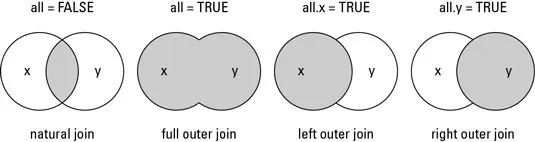

In [32]:
peliculas2<-inner_join(peliculas2, ratings, c("ID"="tconst"))

In [33]:
full_join(peliculas2, ratings, c("ID"="tconst"))

ID,Nombre,Agno,Categoria,averageRating.x,numVotes.x,averageRating.y,numVotes.y
<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>
tt0000009,Miss Jerry,1894,Romance,5.3,206,5.3,206
tt0000147,The Corbett-Fitzsimmons Fight,1897,"Documentary,News,Sport",5.3,472,5.3,472
tt0000502,Bohemios,1905,\N,4.1,15,4.1,15
tt0000574,The Story of the Kelly Gang,1906,"Action,Adventure,Biography",6.0,829,6.0,829
tt0000591,The Prodigal Son,1907,Drama,4.4,20,4.4,20
tt0000615,Robbery Under Arms,1907,Drama,4.3,24,4.3,24
tt0000630,Hamlet,1908,Drama,2.8,26,2.8,26
tt0000675,Don Quijote,1908,Drama,4.2,20,4.2,20
tt0000679,The Fairylogue and Radio-Plays,1908,"Adventure,Fantasy",5.1,68,5.1,68


In [34]:
left_join(peliculas2, ratings, c("ID"="tconst"))

ID,Nombre,Agno,Categoria,averageRating.x,numVotes.x,averageRating.y,numVotes.y
<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>
tt0000009,Miss Jerry,1894,Romance,5.3,206,5.3,206
tt0000147,The Corbett-Fitzsimmons Fight,1897,"Documentary,News,Sport",5.3,472,5.3,472
tt0000502,Bohemios,1905,\N,4.1,15,4.1,15
tt0000574,The Story of the Kelly Gang,1906,"Action,Adventure,Biography",6.0,829,6.0,829
tt0000591,The Prodigal Son,1907,Drama,4.4,20,4.4,20
tt0000615,Robbery Under Arms,1907,Drama,4.3,24,4.3,24
tt0000630,Hamlet,1908,Drama,2.8,26,2.8,26
tt0000675,Don Quijote,1908,Drama,4.2,20,4.2,20
tt0000679,The Fairylogue and Radio-Plays,1908,"Adventure,Fantasy",5.1,68,5.1,68


In [35]:
right_join(peliculas2, ratings, c("ID"="tconst"))

ID,Nombre,Agno,Categoria,averageRating.x,numVotes.x,averageRating.y,numVotes.y
<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>
tt0000009,Miss Jerry,1894,Romance,5.3,206,5.3,206
tt0000147,The Corbett-Fitzsimmons Fight,1897,"Documentary,News,Sport",5.3,472,5.3,472
tt0000502,Bohemios,1905,\N,4.1,15,4.1,15
tt0000574,The Story of the Kelly Gang,1906,"Action,Adventure,Biography",6.0,829,6.0,829
tt0000591,The Prodigal Son,1907,Drama,4.4,20,4.4,20
tt0000615,Robbery Under Arms,1907,Drama,4.3,24,4.3,24
tt0000630,Hamlet,1908,Drama,2.8,26,2.8,26
tt0000675,Don Quijote,1908,Drama,4.2,20,4.2,20
tt0000679,The Fairylogue and Radio-Plays,1908,"Adventure,Fantasy",5.1,68,5.1,68


¿Por que el join por la derecha tiene muchas mas filas que el de la izquierda?

Finalmente hacemos los ajustes necesarios para la columna

In [36]:
peliculas2<-inner_join(peliculas2, ratings, c("ID"="tconst"))

In [37]:
peliculas2

ID,Nombre,Agno,Categoria,averageRating.x,numVotes.x,averageRating.y,numVotes.y
<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>
tt0000009,Miss Jerry,1894,Romance,5.3,206,5.3,206
tt0000147,The Corbett-Fitzsimmons Fight,1897,"Documentary,News,Sport",5.3,472,5.3,472
tt0000502,Bohemios,1905,\N,4.1,15,4.1,15
tt0000574,The Story of the Kelly Gang,1906,"Action,Adventure,Biography",6.0,829,6.0,829
tt0000591,The Prodigal Son,1907,Drama,4.4,20,4.4,20
tt0000615,Robbery Under Arms,1907,Drama,4.3,24,4.3,24
tt0000630,Hamlet,1908,Drama,2.8,26,2.8,26
tt0000675,Don Quijote,1908,Drama,4.2,20,4.2,20
tt0000679,The Fairylogue and Radio-Plays,1908,"Adventure,Fantasy",5.1,68,5.1,68


In [38]:
peliculas2 <- peliculas2 %>% select(-c("numVotes")) %>% rename(c("Calificacion"="averageRating"))

ERROR: [1m[33mError[39m in `select()`:[22m
[33m![39m Can't subset columns that don't exist.
[31m✖[39m Column `numVotes` doesn't exist.


# Interseccion y Diferencia

Supongamos que queremos una lista de peliculas que sean de comedia y romanticas, esto seria una interseccion.

Si queremos la lista de peliculas que sean de comedia pero no de romance, seria diferencia.

Para hacer esto necesitamos modificar nuestras bases de datos

Necesitamos poder leer las categorias del film, lo cual no es posible tal como esta. Recordemos:
 - separate: permite separar una columna en varias según un caracter separador, ejemplo:
  - "hola; como; estan"-> "hola", " como", " estan"  
 - pivot_longer: convierte columnas de una fila a una sola columna distribuida en multiples filas

¿Como podemos obtener todas las peliculas de comedia? ¿y las de comedia romantica?


Necesario: 
 - semi_join(x, y) mantiene todas las observaciones en x con coincidencias en y.
 - anti_join(x, y) descarta todas las observaciones en x con coincidencias en y.

In [ ]:
peliculas2$Categoria[peliculas2$Categoria=="\\N"] <- NA 

In [ ]:
peliculas2[1:100,] %>% 
select(c("ID", "Categoria"))

In [ ]:
peliculas2[1:100,] %>% 
select(c("ID", "Categoria"))%>%
separate("Categoria",c("C1","C2","C3"),  sep=",")

In [ ]:
peliculas2[1:100,] %>% 
select(c("ID", "Categoria"))%>%
separate("Categoria",c("C1","C2","C3"),  sep=",")%>%
pivot_longer(C1:C3,values_to = "Categoria") 


In [ ]:
peliculas2[1:100,] %>% 
select(c("ID", "Categoria"))%>%
separate("Categoria",c("C1","C2","C3"),  sep=",")%>%
pivot_longer(C1:C3,values_to = "Categoria")%>%
drop_na("Categoria")

In [ ]:
ID_romance <- peliculas2[1:100,] %>% 
              select(c("ID", "Categoria"))%>%
              separate("Categoria",c("C1","C2","C3"),  sep=",")%>%
              pivot_longer(C1:C3,values_to = "Categoria")%>%
              drop_na("Categoria")
              filter(Categoria=="Romance") %>%
              select(c("ID"))


# Interseccion

In [ ]:
peliculas2 %>% semi_join(ID_comedy, by="ID")%>%
               semi_join(ID_romance, by="ID")

In [ ]:
peliculas2 %>% semi_join(ID_comedy, by="ID")%>%
               anti_join(ID_romance, by="ID")

# Adicional

Nos gustaria descargar todos los links, además leer las bases de datos y asignarles un nombre. 

Un primer nombre puede ser el nombre del archivo en cuestion.

In [ ]:
library(xml2)
library(rvest)

URL <- "https://datasets.imdbws.com/"

pg <- read_html(URL)

links <- html_attr(html_nodes(pg, "a"), "href")

##Con esto extraemos todos los links de la pagina dicha

links<-as.data.frame(links[2:length(links)])
colnames(links)<-c("links")

names <- separate(links, "links",c("http","x","datasets", "name"),  sep="/")[["name"]]

dbs=list()
for(i in 1:length(names)){
  download.file(links[["links"]][i], names[i])
  dbs[[gsub(".tsv.gz", "",names[i])]]<-as.data.frame(read_tsv(gzfile(names[i])))
}

In [ ]:
#eliminamos tsv.gz para volverlo un nombre
gsub(".tsv.gz", "", "name.basics.tsv.gz")

In [ ]:
nombres<-as.data.frame(read_tsv(gzfile("name.basics.tsv.gz")))

In [ ]:
titulos<-as.data.frame(read_tsv(gzfile("title.basics.tsv.gz")))

In [ ]:
titulos3<-as.data.frame(read_tsv(gzfile("title.principals.tsv.gz")))

In [ ]:
titulos3

In [ ]:
read_tsv(gzfile("name.basics.tsv.gz"))